<a href="https://colab.research.google.com/github/CaioSobreira/casml_aco/blob/master/casml_aco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import numpy as np
import copy
import random
import matplotlib.pyplot as plt
import os

class Town(object):
  def __init__(self, idx, x_position, y_position):
    self.idx = idx
    self.x_position = float(x_position)
    self.y_position = float(y_position)
  
class TownsMatrix(object):
  def __init__(self, num_towns, x_axis_lower_bound, x_axis_upper_bound, y_axis_lower_bound, y_axis_upper_bound, initial_trails_pheromone, rho):
    
    self.x_axis_lower_bound = x_axis_lower_bound
    self.x_axis_upper_bound = x_axis_upper_bound
    self.y_axis_lower_bound = y_axis_lower_bound
    self.y_axis_upper_bound = y_axis_upper_bound
    self.initial_trails_pheromone = initial_trails_pheromone
    self.rho = float(rho)
    self.towns = []
    
    #inicializacao aleatoria
    #self.num_towns = num_towns
    #for n in range(self.num_towns):
    #  x = np.random.uniform(x_axis_lower_bound, x_axis_upper_bound)
    #  y = np.random.uniform(y_axis_lower_bound, y_axis_upper_bound)
    #  town = Town(n, x, y)
    #  self.towns.append(town)
    
    
    #Oliver30 problem:
    self.towns.append(Town(0,54,67))
    self.towns.append(Town(1,54,62))
    self.towns.append(Town(2,37,84))
    self.towns.append(Town(3,41,94))
    self.towns.append(Town(4,2,99))
    self.towns.append(Town(5,7,64))
    self.towns.append(Town(6,25,62))
    self.towns.append(Town(7,22,60))
    self.towns.append(Town(8,18,54))
    self.towns.append(Town(9,4,50))
    self.towns.append(Town(10,13,40))
    self.towns.append(Town(11,18,40))
    self.towns.append(Town(12,24,42))
    self.towns.append(Town(13,25,38))
    self.towns.append(Town(14,44,35))
    self.towns.append(Town(15,41,26))
    self.towns.append(Town(16,45,21))
    self.towns.append(Town(17,58,35))
    self.towns.append(Town(18,62,32))
    self.towns.append(Town(19,82,7))
    self.towns.append(Town(20,91,38))
    self.towns.append(Town(21,83,46))
    self.towns.append(Town(22,71,44))
    self.towns.append(Town(23,64,60))
    self.towns.append(Town(24,68,58))
    self.towns.append(Town(25,83,69))
    self.towns.append(Town(26,87,76))
    self.towns.append(Town(27,74,78))
    self.towns.append(Town(28,71,71))
    self.towns.append(Town(29,58,69))
    
    self.num_towns = len(self.towns)

    #att48 problem -> http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/att48.tsp  
    #self.towns.append(Town(0,6734,1453))
    #self.towns.append(Town(1,2233,10))
    #self.towns.append(Town(2,5530,1424))
    #self.towns.append(Town(3,401,841))
    #self.towns.append(Town(4,3082,1644))
    #self.towns.append(Town(5,7608,4458))
    #self.towns.append(Town(6,7573,3716))
    #self.towns.append(Town(7,7265,1268))
    #self.towns.append(Town(8,6898,1885))
    #self.towns.append(Town(9,1112,2049))
    #self.towns.append(Town(10,5468,2606))
    #self.towns.append(Town(11,5989,2873))
    #self.towns.append(Town(12,4706,2674))
    #self.towns.append(Town(13,4612,2035))
    #self.towns.append(Town(14,6347,2683))
    #self.towns.append(Town(15,6107,669))
    #self.towns.append(Town(16,7611,5184))
    #self.towns.append(Town(17,7462,3590))
    #self.towns.append(Town(18,7732,4723))
    #self.towns.append(Town(19,5900,3561))
    #self.towns.append(Town(20,4483,3369))
    #self.towns.append(Town(21,6101,1110))
    #self.towns.append(Town(22,5199,2182))
    #self.towns.append(Town(23,1633,2809))
    #self.towns.append(Town(24,4307,2322))
    #self.towns.append(Town(25,675,1006))
    #self.towns.append(Town(26,7555,4819))
    #self.towns.append(Town(27,7541,3981))
    #self.towns.append(Town(28,3177,756))
    #self.towns.append(Town(29,7352,4506))
    #self.towns.append(Town(30,7545,2801))
    #self.towns.append(Town(31,3245,3305))
    #self.towns.append(Town(32,6426,3173))
    #self.towns.append(Town(33,4608,1198))
    #self.towns.append(Town(34,23,2216))
    #self.towns.append(Town(35,7248,3779))
    #self.towns.append(Town(36,7762,4595))
    #self.towns.append(Town(37,7392,2244))
    #self.towns.append(Town(38,3484,2829))
    #self.towns.append(Town(39,6271,2135))
    #self.towns.append(Town(40,4985,140))
    #self.towns.append(Town(41,1916,1569))
    #self.towns.append(Town(42,7280,4899))
    #self.towns.append(Town(43,7509,3239))
    #self.towns.append(Town(44,10,2676))
    #self.towns.append(Town(45,6807,2993))
    #self.towns.append(Town(46,5185,3258))
    #self.towns.append(Town(47,3023,1942))
    #self.num_towns = len(self.towns)
    
    self.towns_distances = np.zeros([self.num_towns, self.num_towns])
    self.towns_pheromone_trails = np.zeros([self.num_towns, self.num_towns])
      
    for i in range(self.num_towns):
      for j in range(self.num_towns):
        if i != j:
          self.towns_distances[i][j] = float(self.euclidean_distance(self.towns[i], self.towns[j]))
          self.towns_pheromone_trails[i][j] = self.initial_trails_pheromone 
                            
  def euclidean_distance(self, town_a, town_b):
    return math.sqrt((town_a.x_position - town_b.x_position)**2 + (town_a.y_position - town_b.y_position)**2)
  
  def evaporate_pheromone_trails(self):
    for i in range(self.num_towns):
      for j in range(self.num_towns):
        if i != j:
          self.towns_pheromone_trails[i][j] *= float(1.0 - self.rho)
                            
class Ant(object):
  def __init__(self, alpha, beta, initial_town, towns_matrix, q):
    self.alpha = float(alpha)
    self.beta = float(beta)
    self.initial_town = initial_town
    self.towns_matrix = towns_matrix
    self.q = float(q)
    self.visited_towns = [self.initial_town]
    self.travel_cost = None
    self.best_travel = None
    self.best_travel_cost = float("inf")

  def last_visited_town(self):
    return self.visited_towns[-1]
                            
  def visit_town_probability(self, target_town, remaining_towns):
    last_town = self.last_visited_town()
    pheromone = float(self.towns_matrix.towns_pheromone_trails[last_town.idx][target_town.idx])
    visibility = float(1.0 / (float(self.towns_matrix.towns_distances[last_town.idx][target_town.idx])))
    #sum_ = 0.0
    sum_ = np.nextafter(0, 1)
    for town in remaining_towns:
      if town is not None:                      
        sum_ += (float(self.towns_matrix.towns_pheromone_trails[last_town.idx][town.idx]) ** self.alpha) * float(((1.0 / float(self.towns_matrix.towns_distances[last_town.idx][town.idx]) ** self.beta)))
    probability = float(((pheromone ** self.alpha) * (visibility ** self.beta)) / float(sum_))
    return probability
       
  def travel(self):
    remaining_towns = copy.copy(self.towns_matrix.towns)
    remaining_towns.remove(self.last_visited_town())#removendo a cidade inicial
    while(len(remaining_towns) > 0):
      remaining_towns_prob = []
      next_town = None
      for town in remaining_towns:
        remaining_towns_prob.append(self.visit_town_probability(town, remaining_towns))
      next_town = random.choices(population=remaining_towns, weights=remaining_towns_prob, k=1)[0]
      self.visited_towns.append(next_town)
      remaining_towns.remove(self.last_visited_town())
    self.calculate_travel_cost()
      
  def calculate_travel_cost(self):
    sum_ = 0.0
    for i in range(len(self.visited_towns)):
      if(i < len(self.visited_towns)-1):
        sum_ += float(self.towns_matrix.towns_distances[self.visited_towns[i].idx][self.visited_towns[i+1].idx])
      else:
        sum_ += float(self.towns_matrix.towns_distances[self.visited_towns[i].idx][self.visited_towns[0].idx])
        
    self.travel_cost = float(sum_)
    if self.travel_cost < self.best_travel_cost:
      self.best_travel_cost = self.travel_cost
      self.best_travel = self.visited_towns
      
  def deposit_pheromone(self):
    for i in range(len(self.visited_towns)):
      if(i < len(self.visited_towns)-1):
        self.towns_matrix.towns_pheromone_trails[self.visited_towns[i].idx][self.visited_towns[i+1].idx] += (self.q / self.travel_cost)
      else:
        self.towns_matrix.towns_pheromone_trails[self.visited_towns[i].idx][self.visited_towns[0].idx] += (self.q / self.travel_cost)
      
  def reset(self):
    self.visited_towns = [self.initial_town]
    self.travel_cost = None   
      
class Colony(object):
  def __init__(self, town_matrix, num_ants, alpha, beta, q):
    self.town_matrix = town_matrix
    self.num_ants = num_ants
    self.alpha = alpha
    self.beta = beta
    self.q = q
    self.ants = []
    self.best_ant = None
    self.best_ant_cost = float("inf")
    towns_indexes_random_order = random.sample(list(range(0, (self.town_matrix.num_towns))), self.town_matrix.num_towns)
    aux_idx = 0
    for i in range(num_ants):
      town_idx = towns_indexes_random_order[aux_idx]
      aux_idx += 1
      if aux_idx >= len(towns_indexes_random_order):
        aux_idx = 0
      self.ants.append(Ant(self.alpha, self.beta, self.town_matrix.towns[town_idx], self.town_matrix, self.q))
    
  def ants_travel(self):  
    for ant in self.ants:
      ant.travel()
      
  def deposit_ants_pheromone(self):
    for ant in self.ants:
      ant.deposit_pheromone()
      
  def reset_ants(self):
    for ant in self.ants:
      ant.reset()
      
  def update_best_ant(self, iter_num):
    best_cost = float("inf")
    best_ant = None
    for ant in self.ants:
      if ant.best_travel_cost < best_cost:
        best_cost = ant.best_travel_cost
        best_ant = ant
    if best_cost < self.best_ant_cost:
      self.best_ant = copy.copy(best_ant)
      self.best_ant_cost = best_cost
      
      #plotando nova melhor rota
      for town in self.town_matrix.towns:
        plt.plot(town.x_position, town.y_position, 'ro')
      plt.title("Iteration: {} - Best cost: {}".format(iter_num, self.best_ant_cost))

      for i in range(len(self.best_ant.best_travel)):
        if(i < len(self.best_ant.best_travel)-1):
          plt.plot([self.best_ant.best_travel[i].x_position, self.best_ant.best_travel[i+1].x_position], [self.best_ant.best_travel[i].y_position, self.best_ant.best_travel[i+1].y_position], 'k-', lw=2)
        else:
          plt.plot([self.best_ant.best_travel[i].x_position, self.best_ant.best_travel[0].x_position], [self.best_ant.best_travel[i].y_position, self.best_ant.best_travel[0].y_position], 'k-', lw=2)
      
      fig = plt.gcf()
      fig.savefig('aco/aco_{:04d}.png'.format(iter_num))
      plt.show()
      
class ACO(object):
  def __init__(self, num_towns, x_axis_lower_bound, x_axis_upper_bound, y_axis_lower_bound, y_axis_upper_bound, initial_trails_pheromone, rho, num_ants, alpha, beta, q, num_iterations):
    self.num_towns = num_towns
    self.x_axis_lower_bound = x_axis_lower_bound
    self.x_axis_upper_bound = x_axis_upper_bound
    self.y_axis_lower_bound = y_axis_lower_bound
    self.y_axis_upper_bound = y_axis_upper_bound
    self.initial_trails_pheromone = initial_trails_pheromone
    self.rho = rho
    self.num_ants = num_ants
    self.alpha = alpha
    self.beta = beta
    self.q = q
    self.towns_matrix = TownsMatrix(self.num_towns, self.x_axis_lower_bound, self.x_axis_upper_bound, self.y_axis_lower_bound, self.y_axis_upper_bound, self.initial_trails_pheromone, self.rho)
    self.colony = Colony(self.towns_matrix, self.num_ants, self.alpha, self.beta, q)
    self.best_ant = None
    self.num_iterations = num_iterations  
  
  def update_pheromone_trails(self):
    self.towns_matrix.evaporate_pheromone_trails()
    self.colony.deposit_ants_pheromone()
  
  def optimize(self):
    if not os.path.exists('aco'):
      os.makedirs('aco')
    for i in range(self.num_iterations):
      if(i%100 == 0 and i > 0):
        print("Iteration: {} - Best cost: {}".format(i, self.colony.best_ant.best_travel_cost))
      self.colony.ants_travel()
      self.colony.update_best_ant(i)
      self.update_pheromone_trails()
      self.colony.reset_ants()
    print("Finish! Best cost: {}".format(self.colony.best_ant.best_travel_cost))
    
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:157: RuntimeWarning: underflow encountered in nextafter


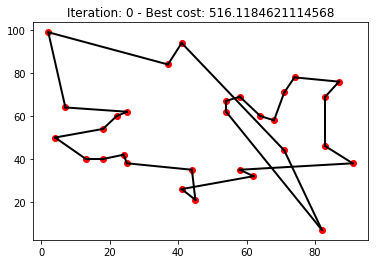

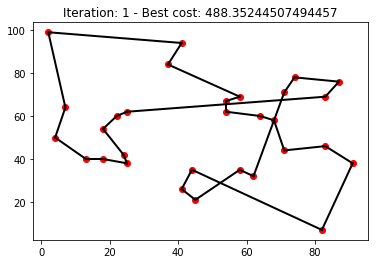

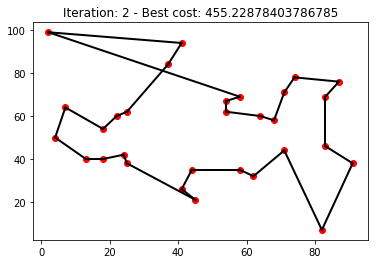

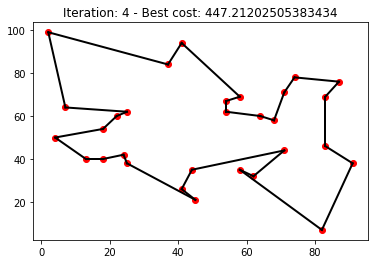

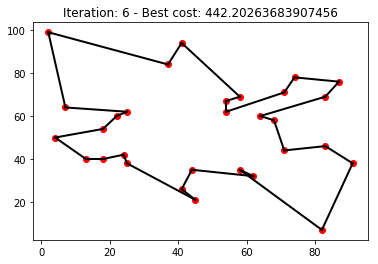

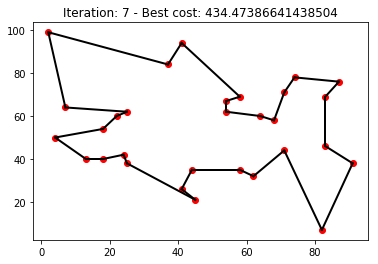

Iteration: 100 - Best cost: 434.47386641438504


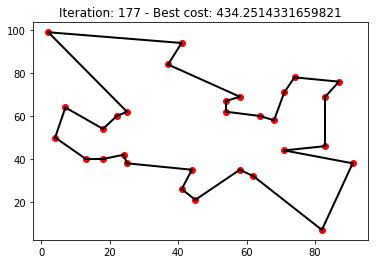

Iteration: 200 - Best cost: 434.2514331659821
Iteration: 300 - Best cost: 434.2514331659821
Iteration: 400 - Best cost: 434.2514331659821
Iteration: 500 - Best cost: 434.2514331659821
Iteration: 600 - Best cost: 434.2514331659821
Iteration: 700 - Best cost: 434.2514331659821
Iteration: 800 - Best cost: 434.2514331659821
Iteration: 900 - Best cost: 434.2514331659821
Iteration: 1000 - Best cost: 434.2514331659821


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:135: RuntimeWarning: underflow encountered in double_scalars


Iteration: 1100 - Best cost: 434.2514331659821
Iteration: 1200 - Best cost: 434.2514331659821
Iteration: 1300 - Best cost: 434.2514331659821
Iteration: 1400 - Best cost: 434.2514331659821
Iteration: 1500 - Best cost: 434.2514331659821
Iteration: 1600 - Best cost: 434.2514331659821
Iteration: 1700 - Best cost: 434.2514331659821
Iteration: 1800 - Best cost: 434.2514331659821
Iteration: 1900 - Best cost: 434.2514331659821
Iteration: 2000 - Best cost: 434.2514331659821
Iteration: 2100 - Best cost: 434.2514331659821
Iteration: 2200 - Best cost: 434.2514331659821
Iteration: 2300 - Best cost: 434.2514331659821
Iteration: 2400 - Best cost: 434.2514331659821
Finish! Best cost: 434.2514331659821


In [113]:
#Oliver30:

num_towns = None #usado em simulacoes com posicoes aleatorias
x_axis_lower_bound = None #usado em simulacoes com posicoes aleatorias
x_axis_upper_bound = None #usado em simulacoes com posicoes aleatorias
y_axis_lower_bound = None #usado em simulacoes com posicoes aleatorias
y_axis_upper_bound = None #usado em simulacoes com posicoes aleatorias

initial_trails_pheromone = 0.1
rho = 0.5
num_ants = 30
alpha = 1.0
beta = 5.0
q = 100.0
num_iterations = 2500
aco = ACO(num_towns, x_axis_lower_bound, x_axis_upper_bound, y_axis_lower_bound, y_axis_upper_bound, initial_trails_pheromone, rho, num_ants, alpha, beta, q, num_iterations)
aco.optimize()